In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [297]:
class LogisticRegression:
    
    def __init__(self, l, max_steps):
        rnd = np.random.RandomState(123)
        self.l = l
        self.max_steps = max_steps
        self.W = rnd.normal(-1, 1, 2)
        self.w0 = rnd.normal(-1, 1, 1)
        self.err = []

    def train(self, X, T):
        for x, t in zip(X, T):
            pred = np.round(self.__sigmoid(self.W.T.dot(x) + self.w0))
            self.err.append(self.__loss(pred, t))
            self.__grad(x, pred, t)

    def predict(self, datum):
        return np.round(self.__sigmoid(self.W.T.dot(datum) + self.w0))
        
    def predict_all(self, y_train):
        pass
    
    def score(self, y_train, y_test):
        answ = np.array([self.predict(y) for y in y_train])
        return answ == y_test
    
    def plot_surface(self):
        pass
    
    def __loss(self, y, t):
        return t * np.log(y) + (1 - t) * np.log(1 - y)
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __grad(self, x, predict, target):
        self.w0 = self.w0 - self.l * (predict - target)
        self.W = self.W - self.l * (predict - target) * x

In [298]:
c1 = np.array(list(zip(np.random.normal(4,1,  size=250),
                       np.random.normal(2, 0.5,  size=250))))
c0 = np.array(list(zip(np.random.normal(1,1,  size=250),
                       np.random.normal(1, 0.6,  size=250))))

y = np.hstack((np.zeros(250), np.ones(250)))
data = np.vstack((c0, c1))
mask = np.arange(len(data))
np.random.shuffle(mask)
y = y[mask]
data = data[mask]

In [299]:
from sklearn.datasets import make_blobs

log_reg = LogisticRegression(0.1, 3)
log_reg.train(data, y)

for x, t in zip(data[:20], y[:20]):
    print(log_reg.predict(x), t)

[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


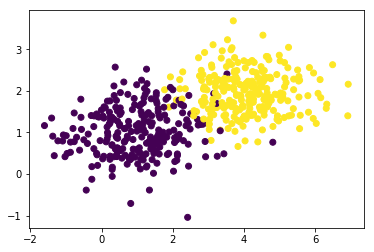

In [300]:
plt.scatter(data[:,0], data[:, 1], c=y)
plt.plot()
plt.show()